# Question Description

Write a program to plot the motion over time of some particles in a vibrating string. Use an iterative simulation algorithm with a discrete approximation of the wave equation.

## Answer

In [8]:
# import the libs
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [2]:
# init the plot attribution
matplotlib.use('TkAgg', force=True)
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 16

In [3]:
# Create a String class to simulate the wave
class String():
    def __init__(self, x, y0, c):
        self.x, self.y, self.y0 = np.copy(x), self.pad_array(y0), self.pad_array(y0)
        self.y_prev = np.copy(self.y0)
        self.c = c

    def pad_array(self, arr):
        """For the convenience of calculation, the original data is padding"""
        return np.concatenate((arr[:1], arr, arr[-1:]))

    def increment(self, dt):
        """Increment shape of string by dt"""
        r = (self.c * dt / np.gradient(self.x)) ** 2
        temp = np.copy(self.y)

        # d2y / dt ^ 2 = c ^ 2 * (d2y / dx ^ 2)
        self.y[1:-1] = 2 * self.y[1:-1] - self.y_prev[1:-1] + \
                       r * (self.y[2:] - 2 * self.y[1:-1] + self.y[:-2])
        self.y_prev = temp

        # Boundary condition
        self.y[[0, 1, -2, -1]] = self.y0[[0, 1, -2, -1]]

In [4]:
# Set the initial position of string wave
def set_initial_state():
    y[np.where(x <= d0_loc * x[-1])] = d0 / (d0_loc * x[-1]) * \
                                       x[np.where(x <= d0_loc * x[-1])]
    y[np.where(x > d0_loc * x[-1])] = -d0 / ((1.0 - d0_loc) * x[-1]) * \
                                      (x[np.where(x > d0_loc * x[-1])] - x[-1])

In [5]:
# init and update the animation of string wave
def init():
    return line, time_text


def update(frame):
    global t

    # set the wave animation with time t
    while t <= time.time():
        string.increment(dt)
        t += dt
        time_text.set_text('t = %.1f s' % (t - t0))

    line.set_ydata(string.y[1:-1])
    return line, time_text

In [6]:
# plot the plot at the specific time
def plot_string_at_t(t_):
    for i in range(t_ * 1000):
        string.increment(dt)

    ax.text(L * 0.5, d0 * 0.9, 't = {}s'.format(t_), fontsize=14, color='#2D70F0', alpha=0.8)
    ax.plot(string.x, string.y[1: -1], color='#2D70F0', alpha=0.3)

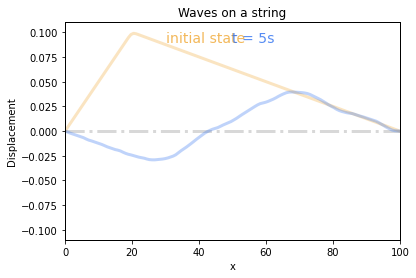

In [9]:
if __name__ == '__main__':
    L = 100  # length of String
    c = 30  # wave speed

    t0 = time.time()  # time of start
    t = time.time()  # time of wave move
    fps = 30

    x = np.linspace(0, L, 128)
    y = np.empty_like(x)

    dt = 0.5 * ((x[-1] - x[0]) / len(x)) / c  # dt <= dx / c
    d0 = 0.1  # initial displacement
    d0_loc = 0.2  # initial position
    set_initial_state()

    string = String(x, y, c)

    fig, ax = plt.subplots()
    line, = ax.plot([], [])

    # init time_text and add a line
    time_text = ax.text(L * 0.8, d0 * 0.9, '')
    ax.axhline(y=0, alpha=0.3, color="gray", ls="-.")

    ax.set_ylim([-1.1 * d0, 1.1 * d0])
    ax.set_xlim([x[0], x[-1]])
    ax.set(xlabel="x", ylabel="Displacement")

    # plot initial state
    string.increment(dt)
    ax.text(L * 0.3, d0 * 0.9, 'initial state', fontsize=14, color='#f0a732', alpha=0.8)
    ax.plot(string.x, string.y[1: -1], color='#f0a732', alpha=0.3)

    plt.title('Waves on a string')

    # plot the string wave at the specific time
    time_ = 5
    plot_string_at_t(time_)
    plt.savefig('Q2_Waves_on_a_string_at_{}'.format(time_))

    # plot wave real-time
    # ani = FuncAnimation(fig, update, init_func=init, frames=1000, interval=1000. / fps)
    # ani.save('Simulation.gif', writer='pillow')

    plt.show(block=True)  # in my laptop, i need to add block=True, but maybe u don't need this in your computer